## Importação, Análises Gerais e Transformação dos Dados

### Bibliotecas

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from pandas import DataFrame


### Importando dataset

In [58]:
df = pd.read_csv("../data/Insurance_claims_event_log_V1.csv", sep=',', decimal=',') 

### Análises gerais
Head, Tail, datatypes, data columns, entries, count nulls, uniques

In [59]:
df.head()

,case_id,activity_name,timestamp,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,car_model,car_year,type_of_accident,user_type
0,a626bc58-a7b2-4eff-aca9-2a622cd0c492,First Notification of Loss (FNOL),2020-09-24 14:08:42.423530,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
1,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Assign Claim,2020-10-13 03:51:28.627923,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
2,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Claim Decision,2020-10-14 22:30:14.948970,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
3,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Set Reserve,2020-10-24 11:49:39.053890,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA
4,a626bc58-a7b2-4eff-aca9-2a622cd0c492,Payment Sent,2020-10-27 05:46:04.378718,Karen Lopez,Thomas Cantu,Ian Garcia,1914.96,75,Collision,Honda,Civic,2012,Rollover,RPA


In [60]:
df.tail()

,case_id,activity_name,timestamp,claimant_name,agent_name,adjuster_name,claim_amount,claimant_age,type_of_policy,car_make,car_model,car_year,type_of_accident,user_type
179995,45719dbf-c504-4ee5-a8bc-ba357aaf54b5,Assign Claim,2021-10-14 12:53:43.253211,Valerie Williams,Melissa Benson,Kristin Gonzalez,8234.96,40,Comprehensive,Hyundai,Elantra,2019,Head-on,Human
179996,45719dbf-c504-4ee5-a8bc-ba357aaf54b5,Claim Decision,2021-10-22 10:40:02.327804,Valerie Williams,Melissa Benson,Kristin Gonzalez,8234.96,40,Comprehensive,Hyundai,Elantra,2019,Head-on,Human
179997,45719dbf-c504-4ee5-a8bc-ba357aaf54b5,Set Reserve,2021-10-25 14:29:19.051135,Valerie Williams,Melissa Benson,Kristin Gonzalez,8234.96,40,Comprehensive,Hyundai,Elantra,2019,Head-on,Human
179998,45719dbf-c504-4ee5-a8bc-ba357aaf54b5,Payment Sent,2021-11-01 19:46:22.587529,Valerie Williams,Melissa Benson,Kristin Gonzalez,8234.96,40,Comprehensive,Hyundai,Elantra,2019,Head-on,Human
179999,45719dbf-c504-4ee5-a8bc-ba357aaf54b5,Close Claim,2021-11-06 10:15:11.732385,Valerie Williams,Melissa Benson,Kristin Gonzalez,8234.96,40,Comprehensive,Hyundai,Elantra,2019,Head-on,Human


In [61]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   case_id           180000 non-null  object
 1   activity_name     180000 non-null  object
 2   timestamp         180000 non-null  object
 3   claimant_name     180000 non-null  object
 4   agent_name        180000 non-null  object
 5   adjuster_name     180000 non-null  object
 6   claim_amount      180000 non-null  object
 7   claimant_age      180000 non-null  int64 
 8   type_of_policy    180000 non-null  object
 9   car_make          180000 non-null  object
 10  car_model         180000 non-null  object
 11  car_year          180000 non-null  int64 
 12  type_of_accident  180000 non-null  object
 13  user_type         180000 non-null  object
dtypes: int64(2), object(12)
memory usage: 19.2+ MB


None

In [62]:
df['claim_amount'] = df['claim_amount'].astype(float)

df.describe()

,claim_amount,claimant_age,car_year
count,180000.000000,180000.000000,180000.000000
mean,5498.598991,51.510233,2016.034367
std,2601.273015,19.691143,3.745014
min,1000.280000,18.000000,2010.000000
25%,3242.482500,34.000000,2013.000000
50%,5498.965000,52.000000,2016.000000
75%,7758.817500,69.000000,2019.000000
max,9999.470000,85.000000,2022.000000


In [107]:

#Análise descritiva das frequências dos valores de cada coluna do dataframe

def data_range(xs: list[float]) -> list[float]:
    return max(xs) - min(xs)

def analisa_frequencias_coluna(dados: DataFrame, nome_coluna: str):
    coluna = dados[nome_coluna]
    dict_frequencias_coluna = Counter(coluna)
    distancia_frequencias = data_range(dict_frequencias_coluna.values())
    maximo = max(dict_frequencias_coluna.values())
    minimo = min(dict_frequencias_coluna.values())

    print(f"Coluna: {nome_coluna}")
    print(f"Frequência Máxima: {maximo} Frequência Mínima: {minimo}")
    print(f"Diferença frequencias: {distancia_frequencias}\n")

for coluna in df.columns:
    analisa_frequencias_coluna(df, coluna)
    

Coluna: case_id
Frequência Máxima: 6 Frequência Mínima: 6
Diferença frequencias: 0

Coluna: activity_name
Frequência Máxima: 30000 Frequência Mínima: 30000
Diferença frequencias: 0

Coluna: timestamp
Frequência Máxima: 1 Frequência Mínima: 1
Diferença frequencias: 0

Coluna: claimant_name
Frequência Máxima: 102 Frequência Mínima: 6
Diferença frequencias: 96

Coluna: agent_name
Frequência Máxima: 72 Frequência Mínima: 6
Diferença frequencias: 66

Coluna: adjuster_name
Frequência Máxima: 90 Frequência Mínima: 6
Diferença frequencias: 84

Coluna: claim_amount
Frequência Máxima: 18 Frequência Mínima: 6
Diferença frequencias: 12

Coluna: claimant_age
Frequência Máxima: 2940 Frequência Mínima: 2304
Diferença frequencias: 636

Coluna: type_of_policy
Frequência Máxima: 60126 Frequência Mínima: 59856
Diferença frequencias: 270

Coluna: car_make
Frequência Máxima: 26640 Frequência Mínima: 24894
Diferença frequencias: 1746

Coluna: car_model
Frequência Máxima: 26640 Frequência Mínima: 24894
Difer

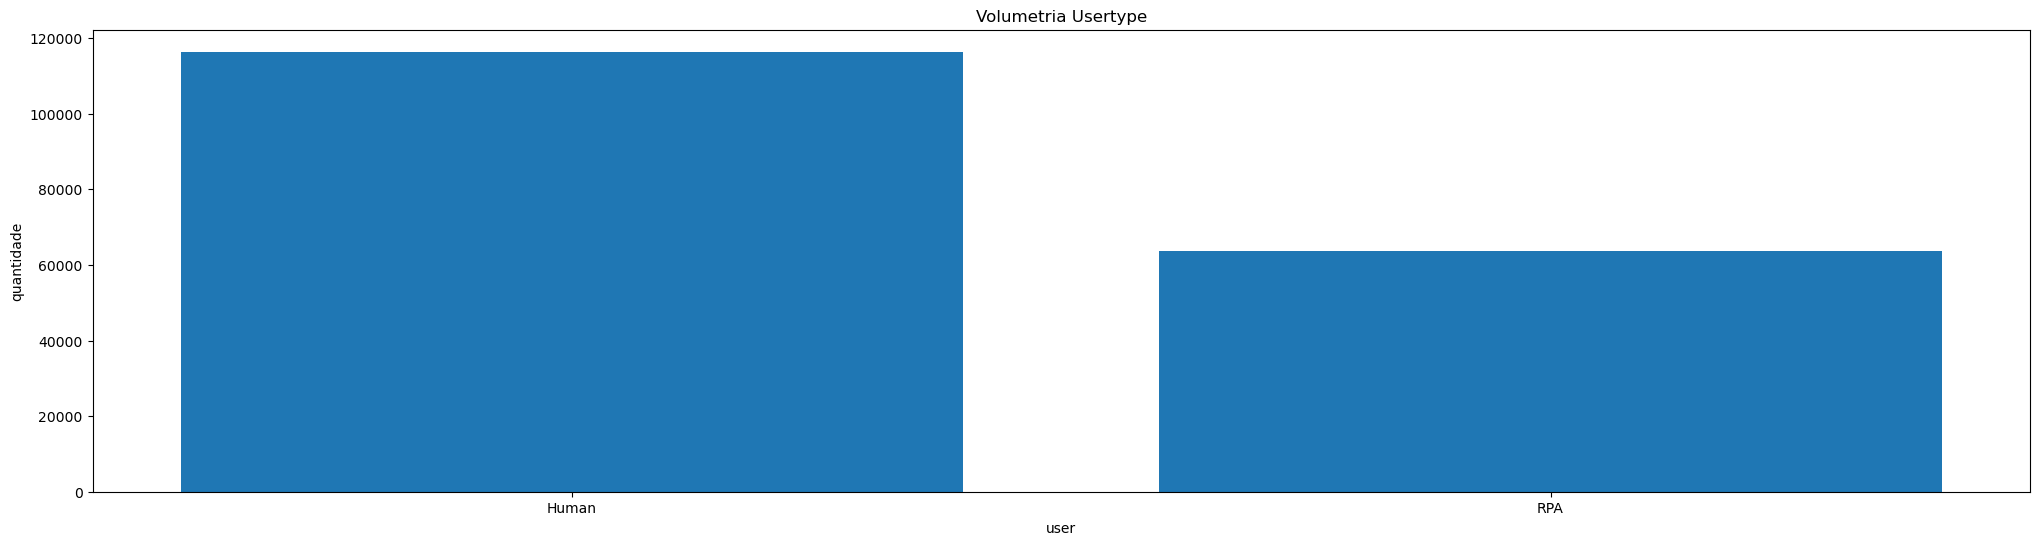

In [ ]:
contagem_user_type = df['user_type'].value_counts()
contagem_user_type.sort_index(inplace=True)

plt.figure(figsize=(25,6))

plt.bar(contagem_user_type.index, contagem_user_type.values)

plt.xticks(contagem_user_type.index)

plt.xlabel('user')
plt.ylabel('quantidade')
plt.title('Volumetria Usertype')

plt.show()

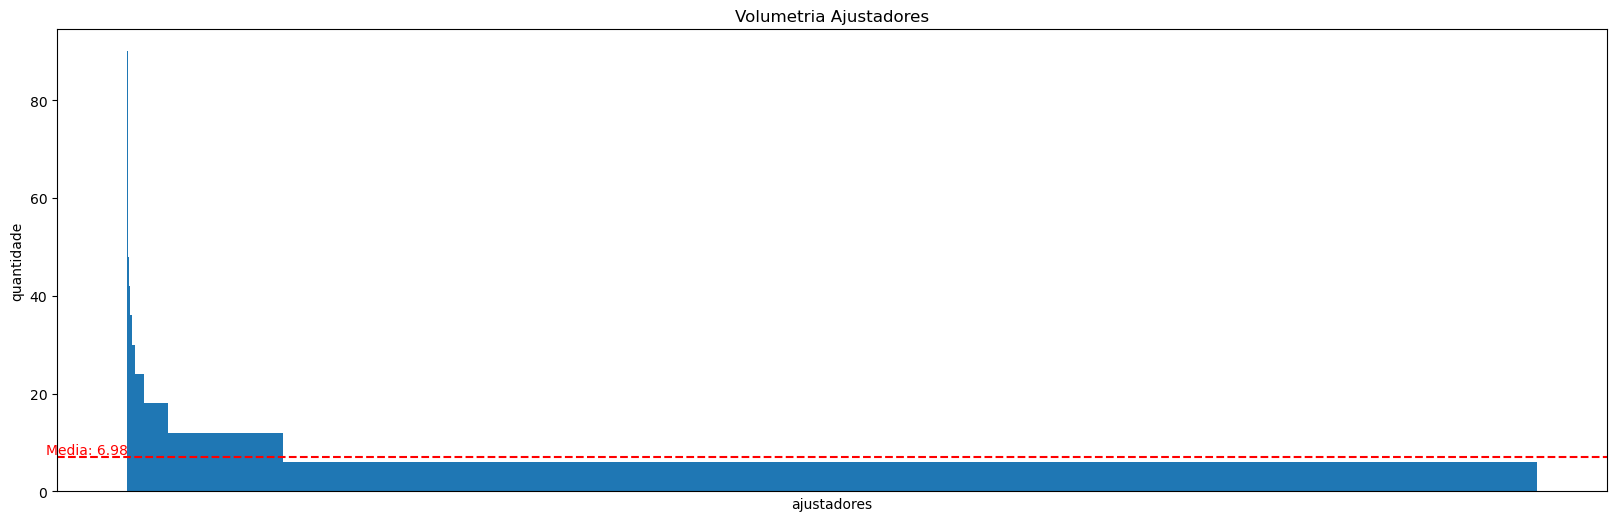

In [ ]:
cont_adjuster_name = df['adjuster_name'].value_counts()
cont_adjuster_name.sort_values(inplace=True, ascending=False)

plt.figure(figsize=(20,6))

plt.bar(cont_adjuster_name.index, cont_adjuster_name.values, width=1.0)

mean_adjuster_name = np.mean(cont_adjuster_name.values)
mean_adjuster_name = round(mean_adjuster_name, 2)

plt.axhline(y=mean_adjuster_name, color='r', linestyle = '--')

plt.text(0, mean_adjuster_name, f'Media: {mean_adjuster_name}', color='r', va='bottom', ha= 'right')

plt.xticks([])

plt.xlabel('ajustadores')
plt.ylabel('quantidade')
plt.title('Volumetria Ajustadores')

plt.show()

In [ ]:
num_points = len(cont_adjuster_name)
display(num_points)

display(data_range(cont_adjuster_name))


25797

84